# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [58]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [59]:
X = dataset.iloc[:, :-1].values #처음부터 마지막 컬럼 직전까지의 데이터(독립변수)
y = dataset.iloc[:, -1].values # 마지막 데이터 (종속변수)

In [60]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X, y)

LinearRegression()

In [62]:
y_pred = reg.predict(X) # X에 대한 예측값 
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

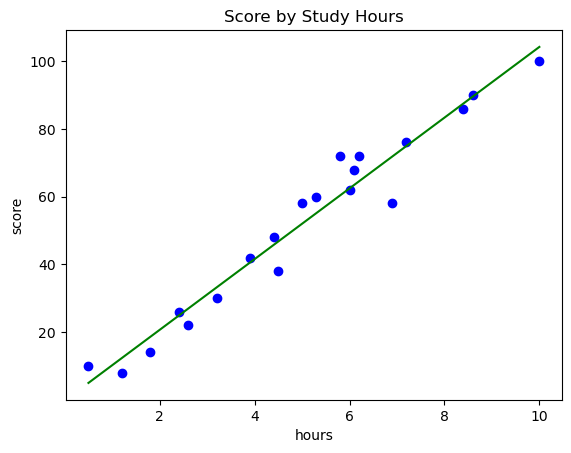

In [63]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green')
plt.title('Score by Study Hours') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [64]:
print('9시간 공부했을 때 예상 점수: ', reg.predict([[9]])) 

9시간 공부했을 때 예상 점수:  [93.77478776]


In [65]:
reg.coef_ # 기울기

array([10.44369694])

In [66]:
reg.intercept_ # y 절편

-0.218484702867201

y = mx + b -> y = 10.44369694x - 0.218484702867201

### 데이터 세트 분리

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [69]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [70]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련: 80% 테스트:20%

In [72]:
X, len(X)

(    hour
 0    0.5
 1    1.2
 2    1.8
 3    2.4
 4    2.6
 5    3.2
 6    3.9
 7    4.4
 8    4.5
 9    5.0
 10   5.3
 11   5.8
 12   6.0
 13   6.1
 14   6.2
 15   6.9
 16   7.2
 17   8.4
 18   8.6
 19  10.0,
 20)

In [73]:
X_train, len(X_train) #훈련 세트 X, 개수

(    hour
 10   5.3
 17   8.4
 6    3.9
 13   6.1
 4    2.6
 2    1.8
 5    3.2
 14   6.2
 9    5.0
 7    4.4
 16   7.2
 11   5.8
 3    2.4
 0    0.5
 15   6.9
 12   6.0,
 16)

In [74]:
X_test, len(X_test) #테스트 세트 X, 개수

(    hour
 18   8.6
 1    1.2
 19  10.0
 8    4.5,
 4)

In [75]:
y, len(y)

(0      10
 1       8
 2      14
 3      26
 4      22
 5      30
 6      42
 7      48
 8      38
 9      58
 10     60
 11     72
 12     62
 13     68
 14     72
 15     58
 16     76
 17     86
 18     90
 19    100
 Name: score, dtype: int64,
 20)

In [76]:
y_train, len(y_train)

(10    60
 17    86
 6     42
 13    68
 4     22
 2     14
 5     30
 14    72
 9     58
 7     48
 16    76
 11    72
 3     26
 0     10
 15    58
 12    62
 Name: score, dtype: int64,
 16)

In [77]:
y_test, len(y_test)

(18     90
 1       8
 19    100
 8      38
 Name: score, dtype: int64,
 4)

### 분리된 데이터를 통한 모델링

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 (훈련 세트)

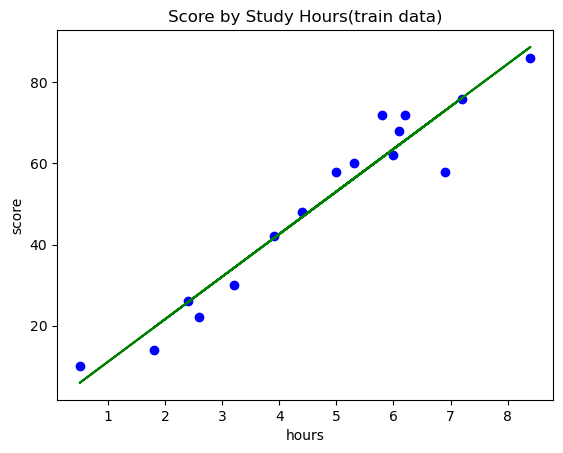

In [80]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by Study Hours(train data)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

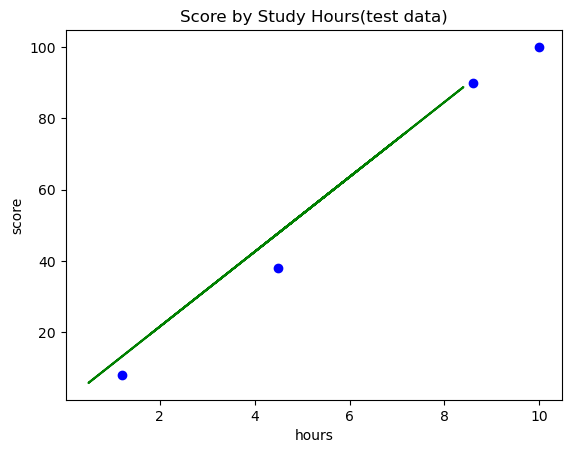

In [81]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by Study Hours(test data)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [82]:
reg.coef_, reg.intercept_

(array([10.49161294]), 0.6115562905169369)

### 모델 평가

In [83]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [84]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가 

0.9356663661221668

### 경사 하강법 (Gradient Descent)

max_iter: 훈련 세트 반복 횟수 (Epoch 횟수)
eta0: 학습률(learning rate)

In [85]:
from sklearn.linear_model import SGDRegressor # SGD : Srochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1) 
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

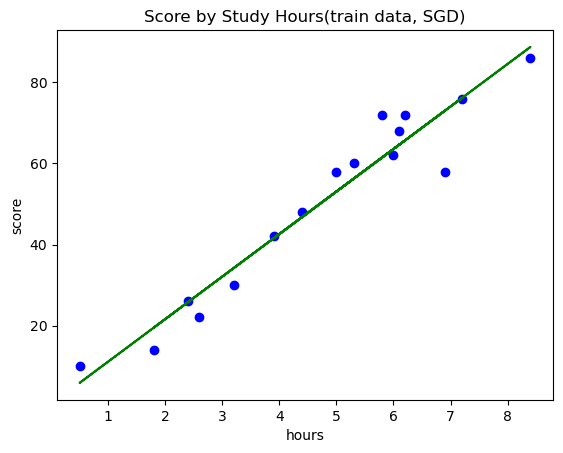

In [86]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by Study Hours(train data, SGD)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [87]:
sr.coef_, sr.intercept_

(array([10.19197471]), array([1.77603038]))

In [88]:
sr.score(X_test, y_test)

0.9748430825252619

In [89]:
sr.score(X_train, y_train)

0.9347804758954794